#**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

#**Data Loading, Preprocessing and Visualization**

In [3]:
data=pd.read_csv('heart.csv')

In [4]:
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

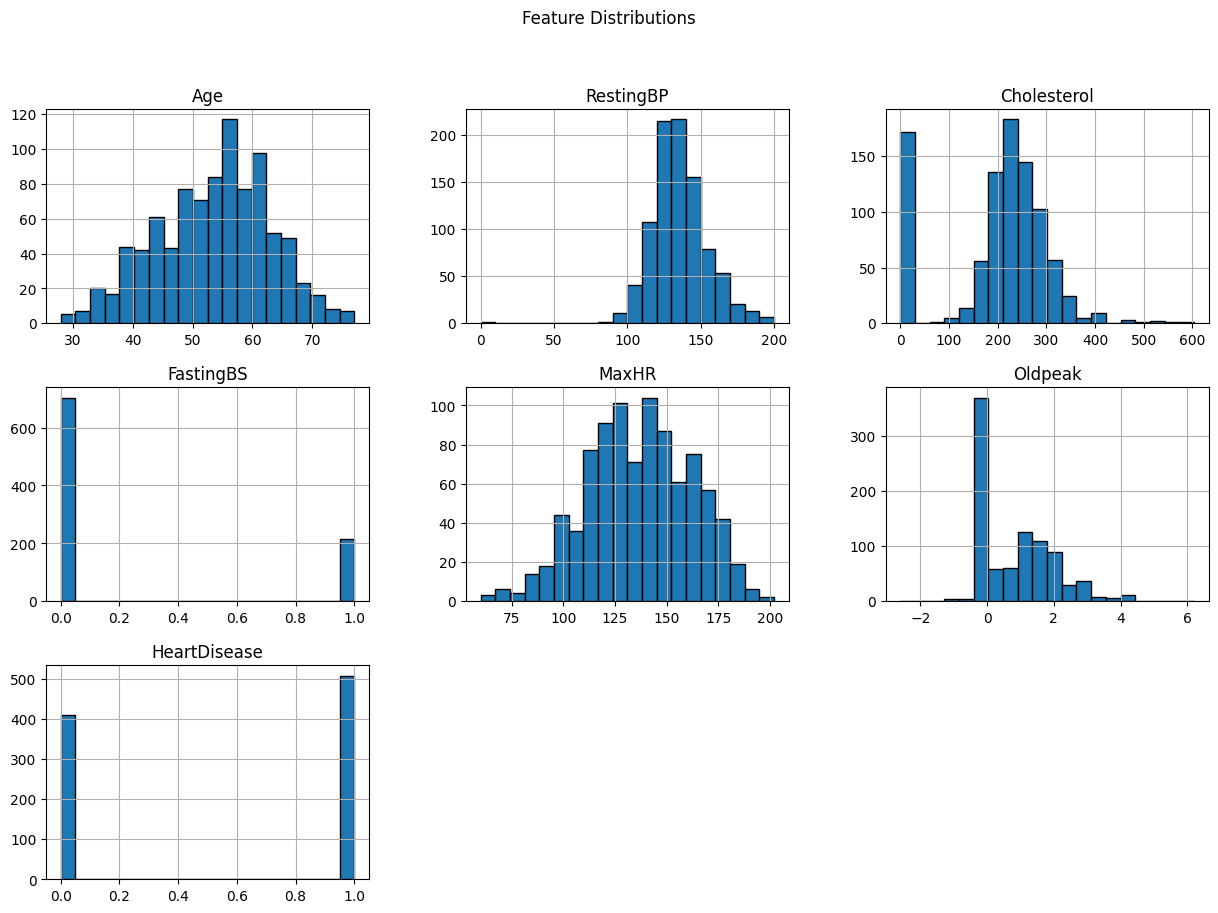

In [13]:
# Histogram for numerical features
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

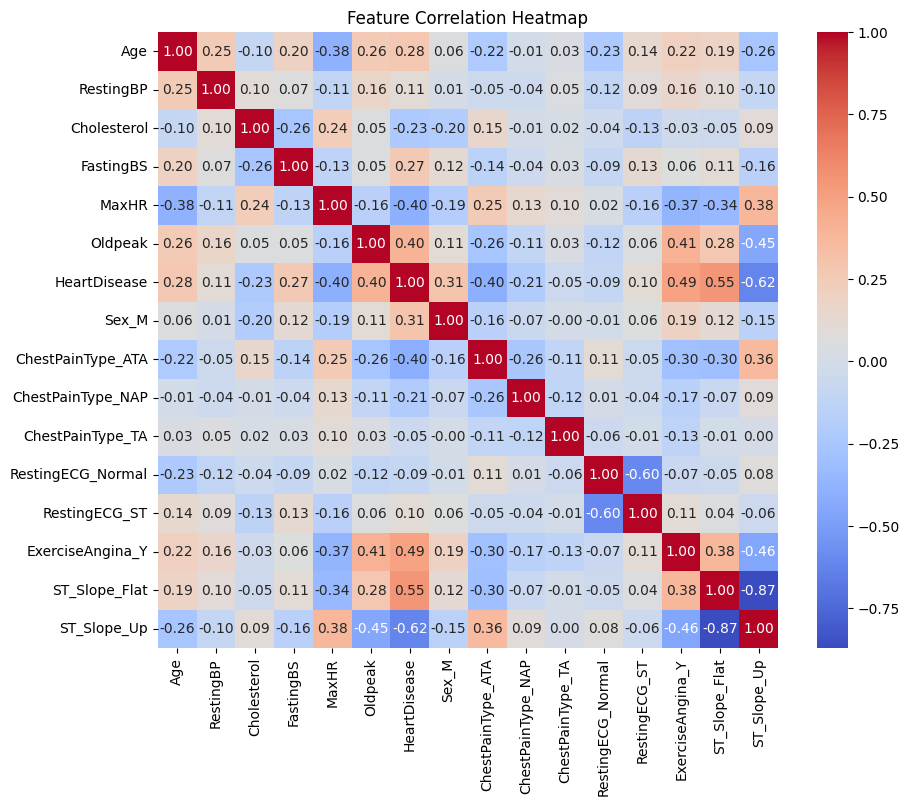

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
# Encode categorical variables
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [7]:
# Separate features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [8]:
# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Evaluation Function**

- $Accuracy=CorrectPredictions/Total Predictions$
- $Precision = True positives/ (True positives + False positives)$
- $Recall=True positives/(True positives+False Negatives)$
- $F1-Score = 2×Precision×Recall/Precision+Recall$


In [10]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    return acc, prec, rec, f1

#**IMPLEMENTING ALGORITHMS**

**LOGISTIC REGRESSION**

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)

Logistic Regression:
Accuracy: 0.85
Precision: 0.90
Recall: 0.84
F1-Score: 0.87


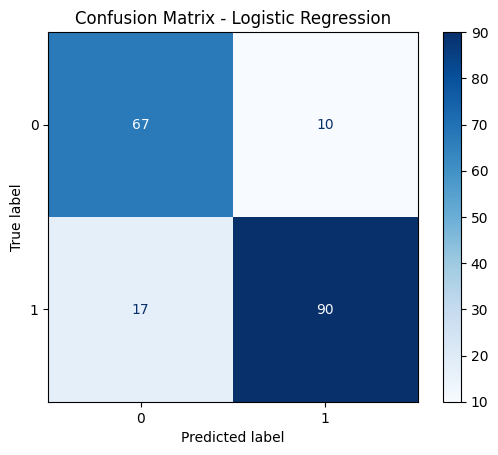

In [17]:
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**DECISION TREE**

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree:")
dt_metrics = evaluate_model(dt, X_test, y_test)

Decision Tree:
Accuracy: 0.83
Precision: 0.86
Recall: 0.85
F1-Score: 0.85


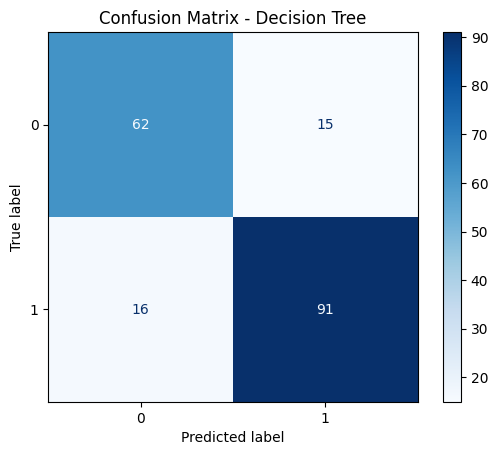

In [21]:
disp = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**RANDOM FOREST**

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest:")
rf_metrics = evaluate_model(rf, X_test, y_test)

Random Forest:
Accuracy: 0.88
Precision: 0.90
Recall: 0.89
F1-Score: 0.89


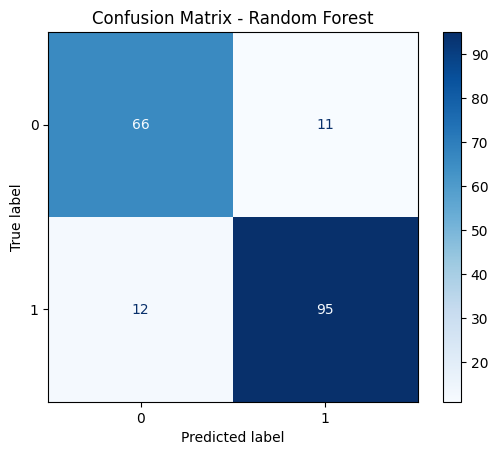

In [27]:
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**SUPPORT VECTOR MACHINE (SVM)**

In [28]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
print("Support Vector Machine:")
svm_metrics = evaluate_model(svm, X_test, y_test)

Support Vector Machine:
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1-Score: 0.89


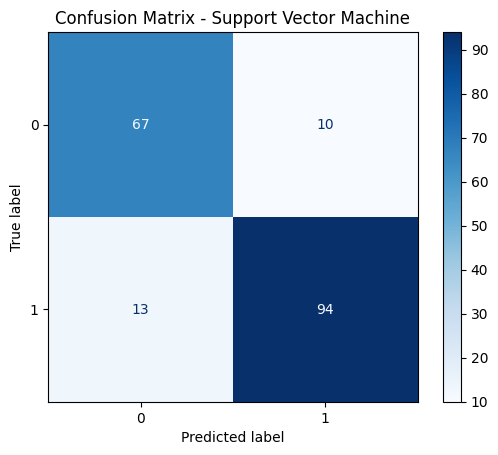

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

**K-NEAREST NEIGHBORS**

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("k-Nearest Neighbors:")
knn_metrics = evaluate_model(knn, X_test, y_test)

k-Nearest Neighbors:
Accuracy: 0.85
Precision: 0.90
Recall: 0.84
F1-Score: 0.87


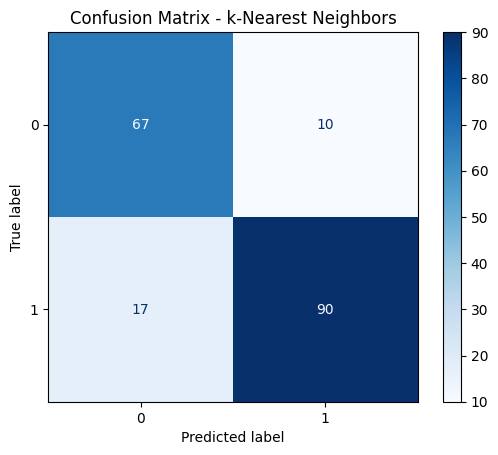

In [31]:
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()

**NEURAL NETWORK**

In [32]:
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
print("Neural Network:")
nn_metrics = evaluate_model(nn, X_test, y_test)

Neural Network:
Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1-Score: 0.88


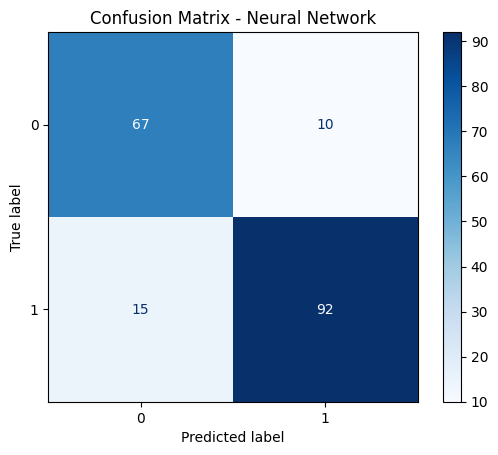

In [33]:
disp = ConfusionMatrixDisplay.from_estimator(nn, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.show()

#**COMPARISON OF RESULTS**

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.853261   0.900000  0.841121  0.869565
Decision Tree        0.831522   0.858491  0.850467  0.854460
Random Forest        0.875000   0.896226  0.887850  0.892019
SVM                  0.875000   0.903846  0.878505  0.890995
k-NN                 0.853261   0.900000  0.841121  0.869565
Neural Network       0.864130   0.901961  0.859813  0.880383


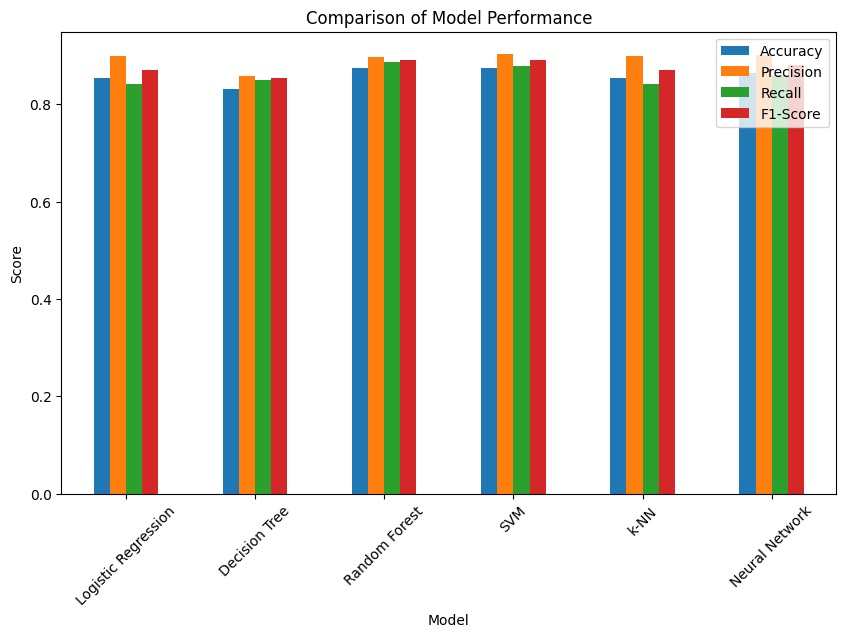

In [39]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN', 'Neural Network']
metrics = [log_reg_metrics, dt_metrics, rf_metrics, svm_metrics, knn_metrics, nn_metrics]

comparison_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=models)
print(comparison_df)

# Plotting comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

*Best Performing Model:*

Random Forest and SVM achieved the highest accuracy of `0.875`.
Random Forest has the highest F1-Score `0.892`, making it a strong candidate for this dataset.

*Precision vs Recall:*

Neural Network has a good balance between precision `0.902` and recall `0.860`, leading to a solid F1-Score `0.880`.
SVM achieved the highest precision `0.904`, indicating fewer false positives.

**Receiver-operating characteristic curves (ROC)**

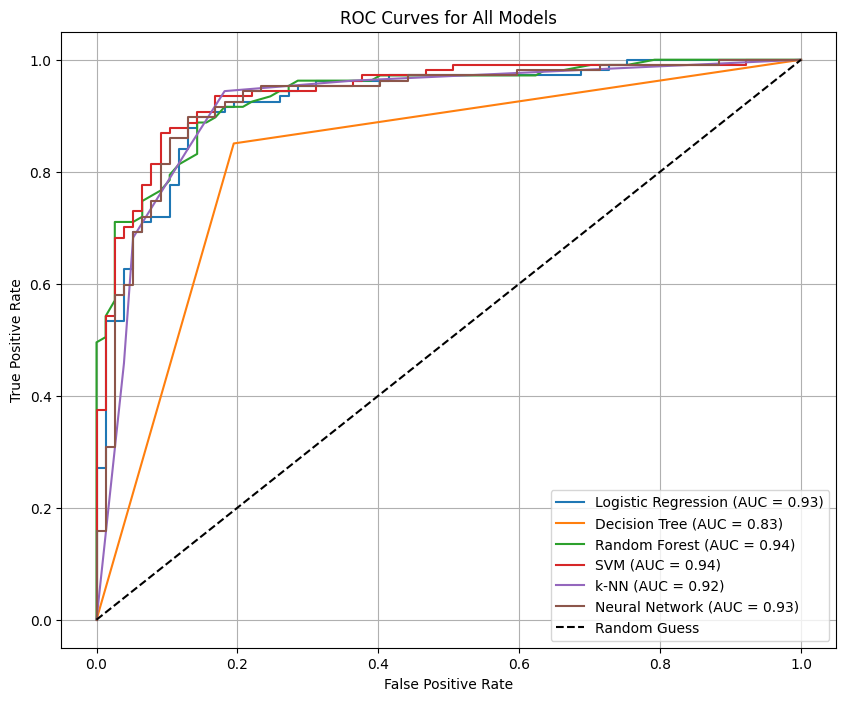

In [38]:
# Initializing a dictionary to store the ROC data for each model
roc_data = {}

# Logistic Regression
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['Logistic Regression'] = (fpr, tpr, roc_auc)

# Decision Tree
y_pred_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['Decision Tree'] = (fpr, tpr, roc_auc)

# Random Forest
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['Random Forest'] = (fpr, tpr, roc_auc)

# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_prob = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['SVM'] = (fpr, tpr, roc_auc)

# k-Nearest Neighbors (k-NN)
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['k-NN'] = (fpr, tpr, roc_auc)

# Neural Network
y_pred_prob = nn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_data['Neural Network'] = (fpr, tpr, roc_auc)

# Plotting all ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()